# Homework for Volume 2, Section 15.6
## Seong-Eun Cho

In [97]:
from mpl_toolkits.mplot3d import Axes3D
import scipy.linalg as la
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from autograd import grad
from autograd import elementwise_grad
import autograd.numpy as anp


## Problem 15.31

Feasible region and the points

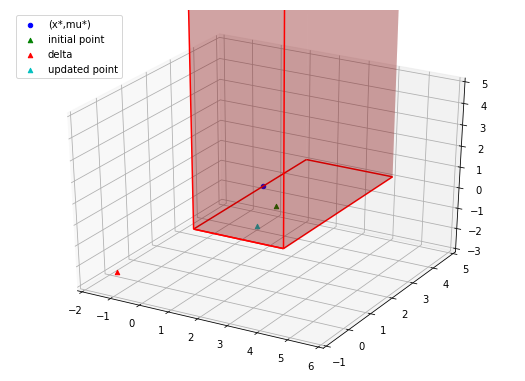

In [145]:
def rect_prism(x_range, y_range, z_range):
    # TODO: refactor this to use an iterotor
    fig = plt.figure(figsize=(7,5))
    ax = Axes3D(fig)
    xx, yy = np.meshgrid(x_range, y_range)
    ax.plot_wireframe(xx, yy, np.ones((len(xx), len(yy)))*z_range[0], color="r")
    ax.plot_surface(xx, yy, np.ones((len(xx), len(yy)))*z_range[0], color="r", alpha=0.2)
    ax.plot_wireframe(xx, yy, np.ones((len(xx), len(yy)))*z_range[1], color="r")
    ax.plot_surface(xx, yy, np.ones((len(xx), len(yy)))*z_range[1], color="r", alpha=0.2)


    yy, zz = np.meshgrid(y_range, z_range)
    #ax.plot_wireframe(x_range[0], yy, zz, color="r")
    ax.plot_surface(x_range[0], yy, zz, color="r", alpha=0.2)
    #ax.plot_wireframe(x_range[1], yy, zz, color="r")
    ax.plot_surface(x_range[1], yy, zz, color="r", alpha=0.2)

    xx, zz = np.meshgrid(x_range, z_range)
    ax.plot_wireframe(xx, y_range[0], zz, color="r")
    ax.plot_surface(xx, y_range[0], zz, color="r", alpha=0.2)
    #ax.plot_wireframe(xx, y_range[1], zz, color="r")
    ax.plot_surface(xx, y_range[1], zz, color="r", alpha=0.2)
    
    ax.scatter(1, 3, 0, c='b', marker='o', label="(x*,mu*)")
    ax.scatter(3, 1, 1, c='g', marker='^', label="initial point")
    ax.scatter(-1.38076923, -0.38461538, -2.53076923, c='r', marker='^', label="delta")
    ax.scatter(2.4543658632951404, 0.8478862109838009, 0.0, c='c', marker='^', label="updated point")
    ax.set_xlim(-2, 6)
    ax.set_ylim(-1, 5)
    ax.set_zlim(-3, 5)

rect_prism(np.array([1, 4]), np.array([0, 5]), np.array([0, 100]))
plt.legend(loc=2)
plt.show()


vii)

In [79]:
DF = np.array([[18,-1,1],[-1,-2,0],[1,0,-1]])
b = np.array([-27, 43/20, 23/20])
la.solve(DF, b)

array([-1.38076923, -0.38461538, -2.53076923])

ix)

In [120]:
x_a = lambda a: 3 + a*(-1.381)
mu1_a = lambda a: 1 + a*(-0.385)
mu2_a = lambda a: 1 + a*(-2.531)
F_a = lambda a: anp.array([3*x_a(a)**2 - mu1_a(a) + mu2_a(a), mu1_a(a)*(1 - x_a(a)), mu2_a(a)*(x_a(a)-4)])
s = 1/10
nu = 3/2
phi = lambda a: F_a(a)[0]**2 + (F_a(a)[1] - s*nu)**2 + (F_a(a)[2] - s*nu)**2
a = 1
while phi(a) > phi(0) + (1/2) * a * grad(phi)(0.):
    a *= 0.99
print(a)

0.9135172474836407
